<h1 style="text-align:center">Exploratory Data Analysis</h1>

#### Objective:  What are the main characteristics which have the most impact on the car price?

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Import Dataset

In [7]:
path = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv"
df = pd.read_csv(path)
df.head(5)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## Analyzing Individual Feature Pattern using Visulaization

### 1. Continuous Numerical Variable

In [8]:
df_num = df[["wheel-base","length","width","height","curb-weight","engine-size","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg"]]
df_num.head()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27
1,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27
2,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26
3,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30
4,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22


In [26]:
df_num.columns

Index(['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size',
       'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm',
       'city-mpg', 'highway-mpg'],
      dtype='object')

(-255.00431093986214, 5373.50678101316, 13206.939374195015, 13211.11891304897)

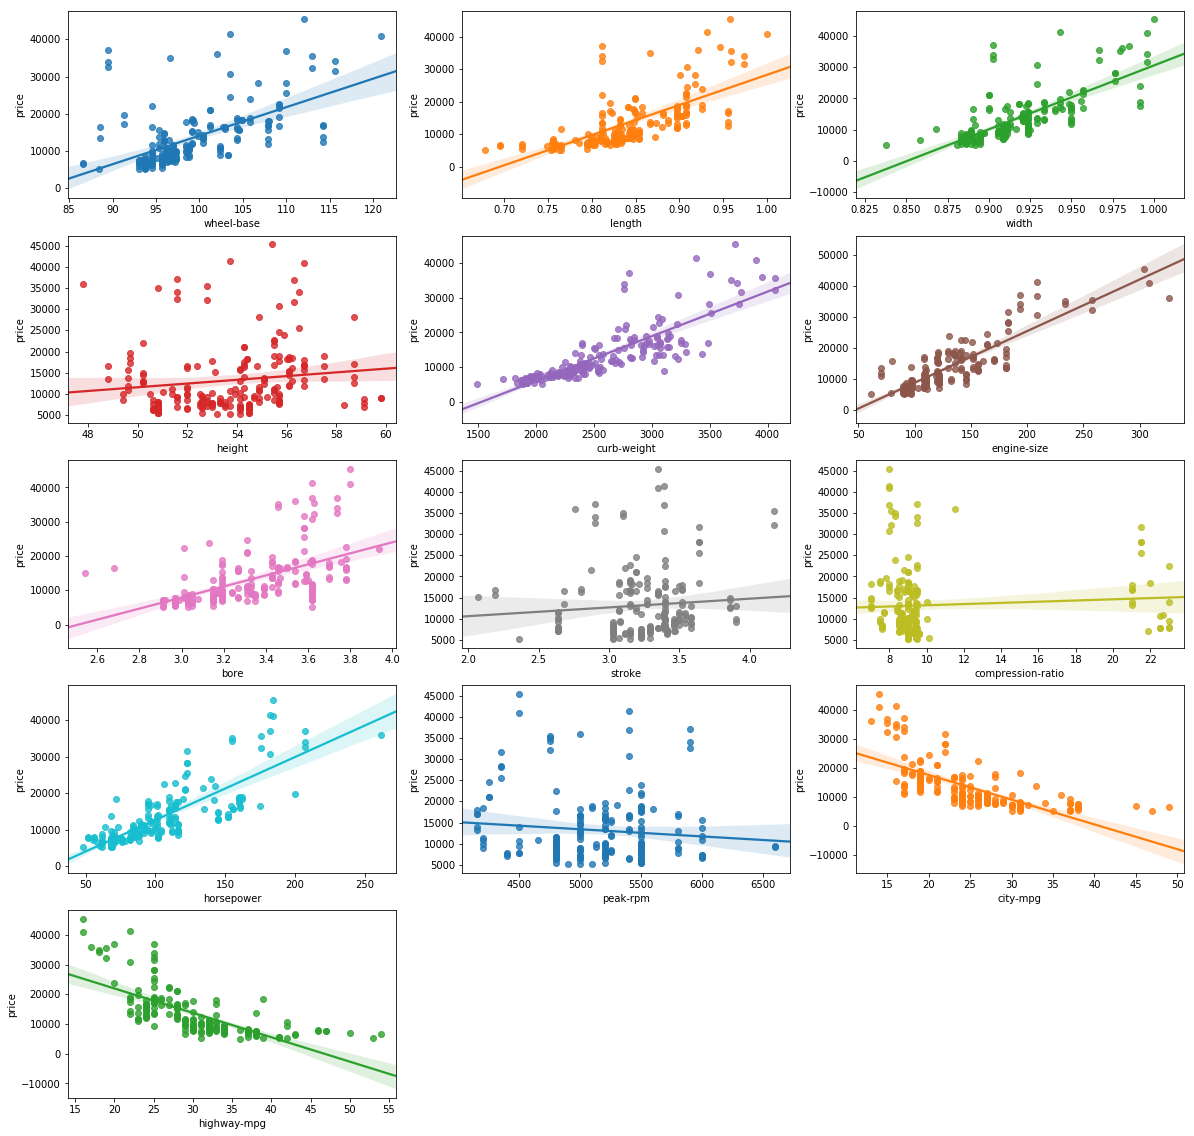

In [30]:
fig, axes = plt.subplots(5,3,figsize=(20,20))
counts=0
for i in range(5):
    for j in range(3):
        if counts < 13:
            sns.regplot(x=df_num.columns[counts],y="price",data=df,ax=axes[i][j])
            counts +=1
        else:
            break
            

axes[4][1].axis("off")
axes[4][2].axis("off")

From the above result we can conclude that :

<b>Positive relationship:</b>
- Wheel-base
- Length
- Width
- Curb weight
- Engine size
- Bore
- Horse power

<b>Negative Relationship:</b>
- Highway mpg
- City mpg


<b>No Relationship:</b>
- Peak rpm
- Stroke
- Compression ratio
- Height

### 2. Categorical Variable

In [33]:
df_cat = df[["make","aspiration","num-of-doors","body-style","drive-wheels","engine-location","engine-type","fuel-system","num-of-cylinders","horsepower-binned"]]
df_cat.head(5)

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,fuel-system,num-of-cylinders,horsepower-binned
0,alfa-romero,std,two,convertible,rwd,front,dohc,mpfi,four,Medium
1,alfa-romero,std,two,convertible,rwd,front,dohc,mpfi,four,Medium
2,alfa-romero,std,two,hatchback,rwd,front,ohcv,mpfi,six,Medium
3,audi,std,four,sedan,fwd,front,ohc,mpfi,four,Medium
4,audi,std,four,sedan,4wd,front,ohc,mpfi,five,Medium


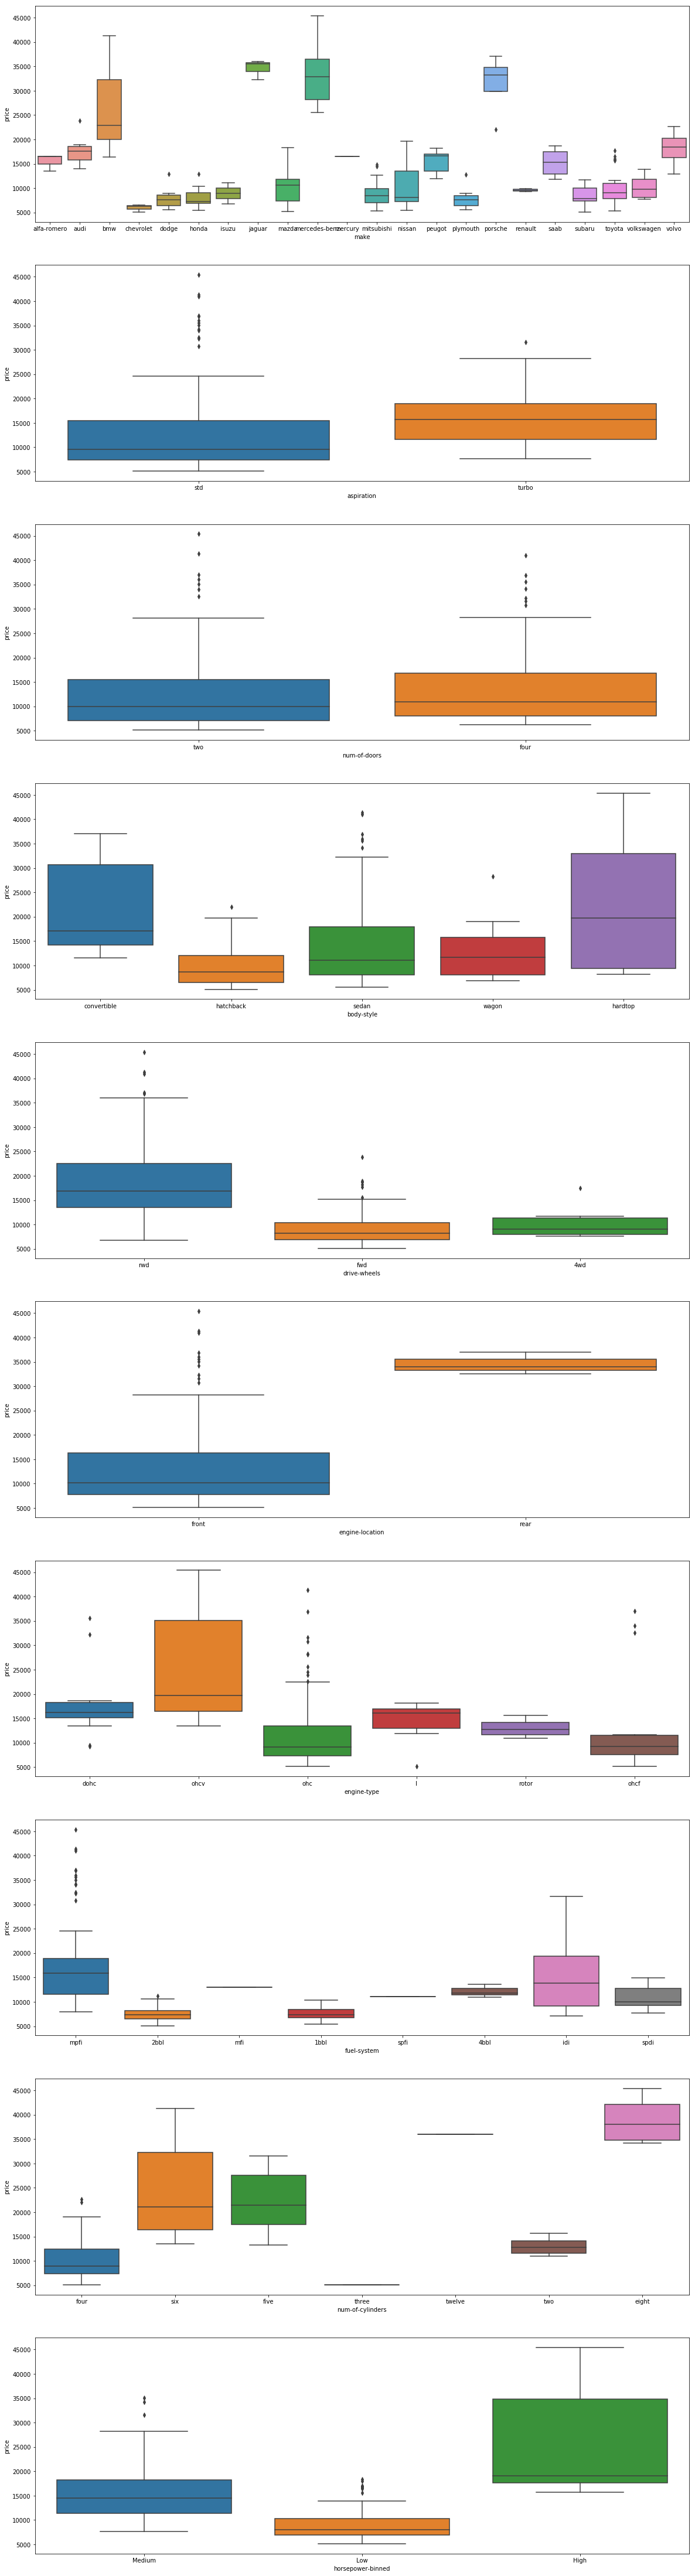

In [34]:
fig, axes = plt.subplots(10,1,figsize=(20,80))
count = 0
for i in range (10):
    sns.boxplot(x=df_cat.columns[count],y="price",data=df,ax=axes[i])
    count +=1

Conclusion, the following variables might be a good potential variable as a predictor of price:
- Drive-wheels
- Engine-location
    

## Correlation and Causation

### Pearson Correlation

In [11]:
from scipy import stats

In [12]:
#Wheel-base VS Price
pearson_coef, p_value = stats.pearsonr(df["wheel-base"],df["price"])
print("Pearson Co-effice=ient : ",pearson_coef," and P-value : ",p_value)

Pearson Co-effice=ient :  0.5846418222655081  and P-value :  8.076488270732955e-20


In [13]:
#Length VS Price
pearson_coef, p_value = stats.pearsonr(df["length"],df["price"])
print("Pearson Co-effice=ient : ",pearson_coef," and P-value : ",p_value)

Pearson Co-effice=ient :  0.690628380448364  and P-value :  8.016477466159053e-30


In [14]:
#Width VS Price
pearson_coef, p_value = stats.pearsonr(df["width"],df["price"])
print("Pearson Co-effice=ient : ",pearson_coef," and P-value : ",p_value)

Pearson Co-effice=ient :  0.7512653440522674  and P-value :  9.200335510481426e-38


In [15]:
#Curb-weight VS Price
pearson_coef, p_value = stats.pearsonr(df["curb-weight"],df["price"])
print("Pearson Co-effice=ient : ",pearson_coef," and P-value : ",p_value)

Pearson Co-effice=ient :  0.8344145257702846  and P-value :  2.1895772388936997e-53


In [16]:
#Engine-size VS Price
pearson_coef, p_value = stats.pearsonr(df["engine-size"],df["price"])
print("Pearson Co-effice=ient : ",pearson_coef," and P-value : ",p_value)

Pearson Co-effice=ient :  0.8723351674455185  and P-value :  9.265491622197996e-64


In [17]:
#Bore VS Price
pearson_coef, p_value = stats.pearsonr(df["bore"],df["price"])
print("Pearson Co-effice=ient : ",pearson_coef," and P-value : ",p_value)

Pearson Co-effice=ient :  0.5431553832626602  and P-value :  8.049189483935364e-17


In [18]:
#Horsepower VS Price
pearson_coef, p_value = stats.pearsonr(df["horsepower"],df["price"])
print("Pearson Co-effice=ient : ",pearson_coef," and P-value : ",p_value)

Pearson Co-effice=ient :  0.8095745670036559  and P-value :  6.36905742825998e-48


In [19]:
#Highway-mpg VS Price
pearson_coef, p_value = stats.pearsonr(df["highway-mpg"],df["price"])
print("Pearson Co-effice=ient : ",pearson_coef," and P-value : ",p_value)

Pearson Co-effice=ient :  -0.7046922650589529  and P-value :  1.7495471144476807e-31


In [20]:
#City-mpg VS Price
pearson_coef, p_value = stats.pearsonr(df["city-mpg"],df["price"])
print("Pearson Co-effice=ient : ",pearson_coef," and P-value : ",p_value)

Pearson Co-effice=ient :  -0.6865710067844677  and P-value :  2.3211320655676368e-29


From the above result we can conclude that :
- Wheel-base P-value is statistically significant but linear relationship is moderate
- Length P-value is statistically significant but linear relationship is moderate 
- Width P-value is statistically significant but linear relationship is strong 
- Curb-weight P-value is statistically significant but linear relationship is strong 
- Engine-size P-value is statistically significant but linear relationship is strong 
- Bore P-value is statistically significant but linear relationship is moderate 
- Horsepower P-value is statistically significant but linear relationship is strong 
- Highway-mpg P-value is statistically significant but linear relationship is strong and negatively related 
- City-mpg P-value is statistically significant but linear relationship is moderate and negatively related

## ANOVA

In [21]:
df_grp = df[["drive-wheels","price"]]
df_grp = df_grp.groupby(['drive-wheels'])
df_grp.head()

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
6,fwd,17710.0
7,fwd,18920.0
8,fwd,23875.0
9,rwd,16430.0


In [22]:
#ANOVA for drive-wheels
f_val, p_val = stats.f_oneway(df_grp.get_group("fwd")["price"],df_grp.get_group("rwd")["price"],df_grp.get_group("4wd")["price"])
print("ANOVA : F-value : ",f_val," and P-value: ",p_val)

ANOVA : F-value :  67.95406500780399  and P-value:  3.3945443577151245e-23


This is a great result because F-value shows large value which means there is a strong correlation

In [23]:
df["engine-location"].unique()

array(['front', 'rear'], dtype=object)

In [24]:
grp_engineloc = df[["engine-location","price"]]
grp_engineloc = grp_engineloc.groupby(["engine-location"])
grp_engineloc.head()

,engine-location,price
0,front,13495.0
1,front,16500.0
2,front,16500.0
3,front,13950.0
4,front,17450.0
123,rear,32528.0
124,rear,34028.0
125,rear,37028.0


In [25]:
#ANOVA for engine-location
f_val, p_val = stats.f_oneway(grp_engineloc.get_group("front")["price"],grp_engineloc.get_group("rear")["price"])
print("ANOVA : F-value : ",f_val," and P-value: ",p_val)

ANOVA : F-value :  24.495550318865693  and P-value:  1.583490019777699e-06


This is a great result because F-value shows large value which means there is a strong correlation

## Conclusion (Important Variables) :

We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

#### Numerical Variables :

- Wheel-base 
- Length 
- Width 
- Curb-weight
- Engine-size
- Bore
- Horsepower
- Highway-mpg
- City-mpg

#### Categorical Variables :

- Drive-wheels
- Engine-location